In [1]:
import pandas as pd 
import numpy as np 


In [16]:
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
sns.set_style('darkgrid')

In [68]:
df = pd.read_csv('USA_Housing.csv')

In [69]:
df.head()  # this data is artificially created

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [20]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [21]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

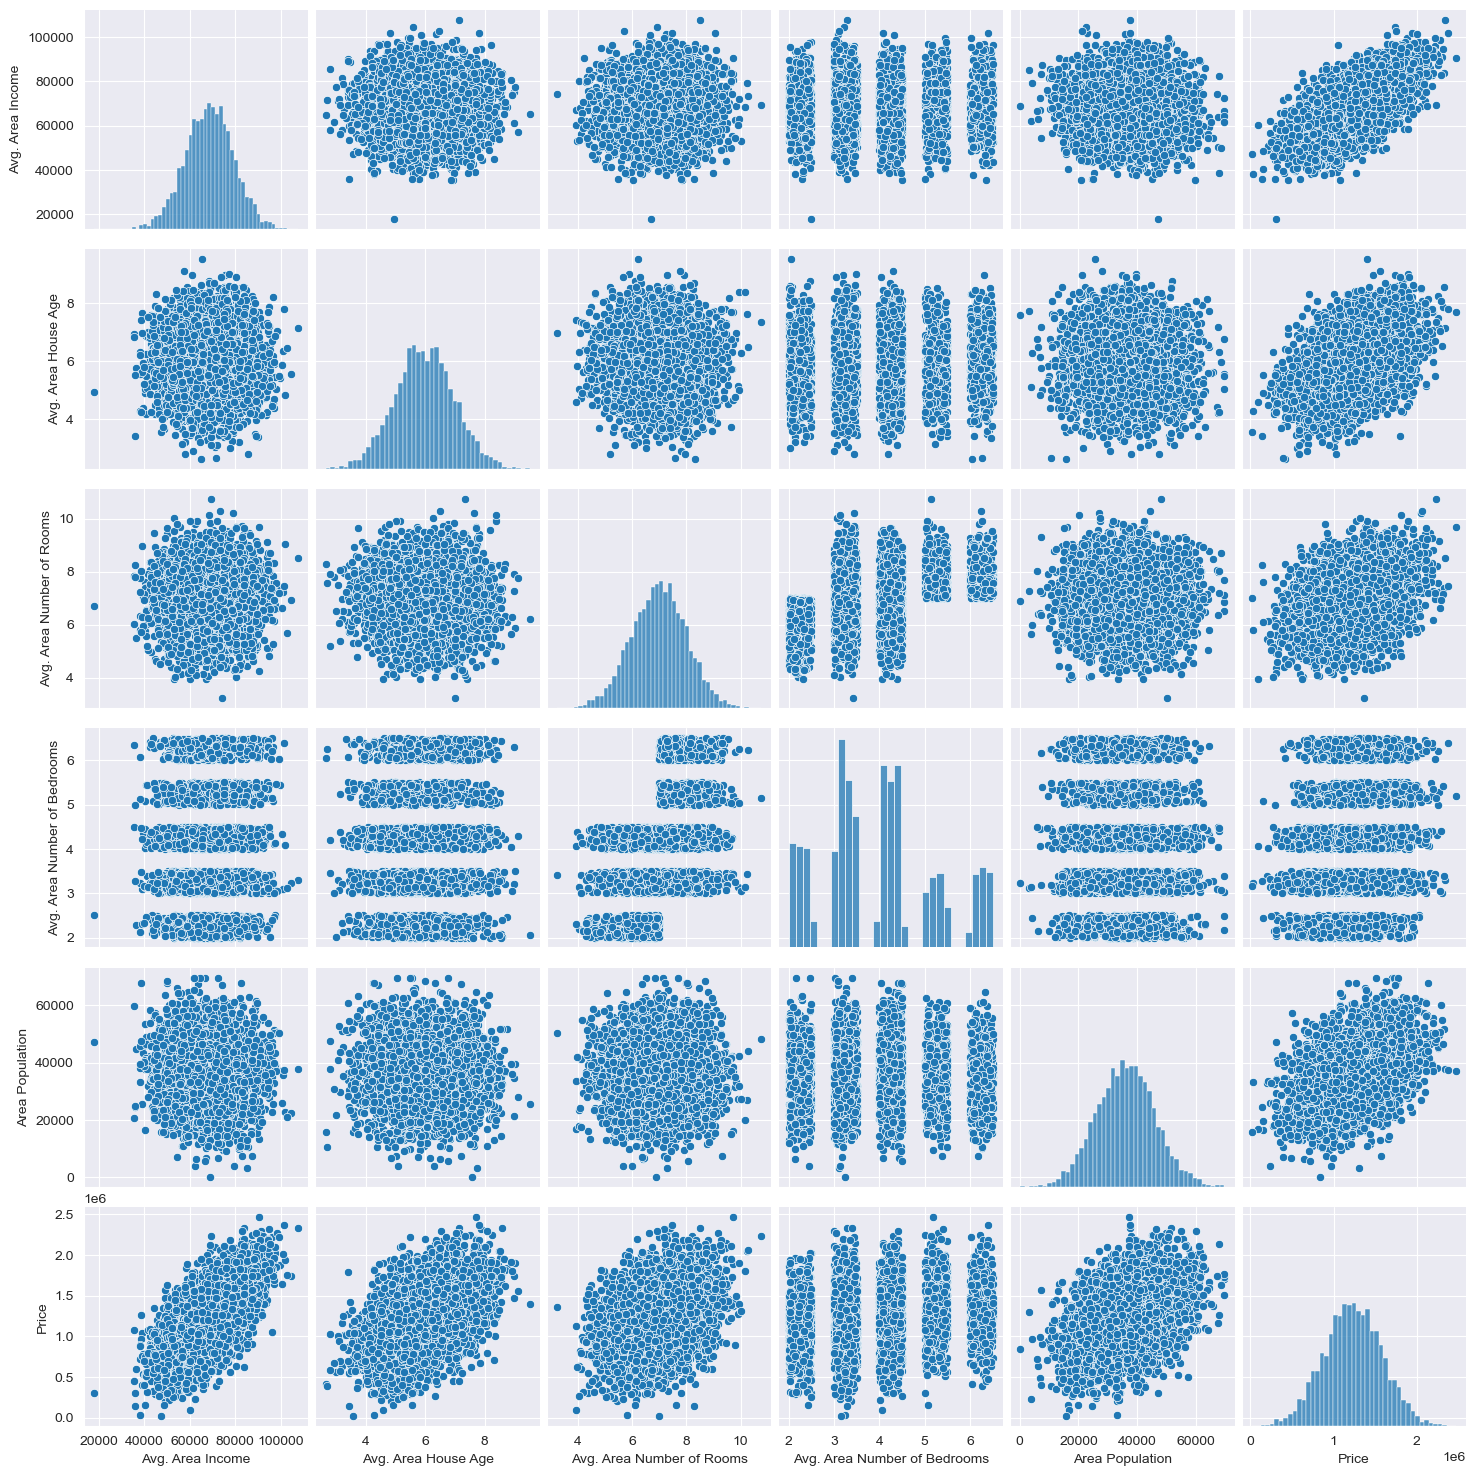

In [22]:
sns.pairplot(df)

/var/folders/l5/r131f0_163sc57m30fj7cm4m0000gn/T/ipykernel_18110/834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

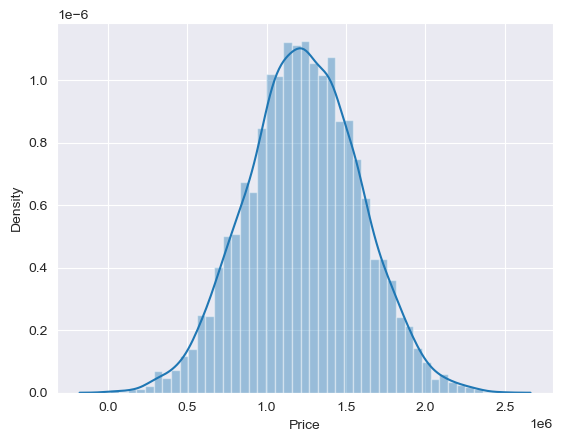

In [24]:
sns.distplot(df['Price'])
# the average price is somewhere between the one million or 1.5 million mark

/var/folders/l5/r131f0_163sc57m30fj7cm4m0000gn/T/ipykernel_18110/1990363372.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

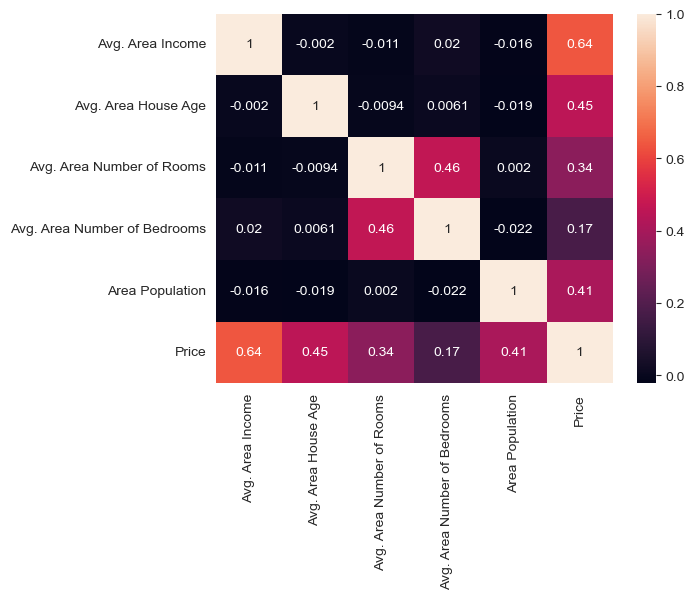

In [26]:
sns.heatmap(df.corr(), annot=True)
#there is a full correlation a

In [27]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [28]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [33]:
y = df['Price']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [36]:
# We need to train the model
from sklearn.linear_model import LinearRegression

In [37]:
lm = LinearRegression()

In [38]:
lm.fit(X_train,y_train)

LinearRegression()

In [39]:
#chech out model by checking the coefficients
#this is the intercept
print(lm.intercept_)

-2640159.79685191


In [40]:
#we can check the coefficiett
lm.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [41]:
#create Dataframe for the coefficetn
X_train.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population'],
      dtype='object')

In [42]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [43]:
cdf
# the coefficient means if one unit increase for ex Area income is asscotiated  with an increase of $21.50  price

,Coeff
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [49]:
#get prediction for our model 

In [51]:
predictions = lm.predict(X_test)

In [52]:
predictions
#we know y_test contain correct the correct prices of the house

array([1260960.70567626,  827588.75560352, 1742421.24254328, ...,
        372191.40626952, 1365217.15140895, 1914519.54178824])

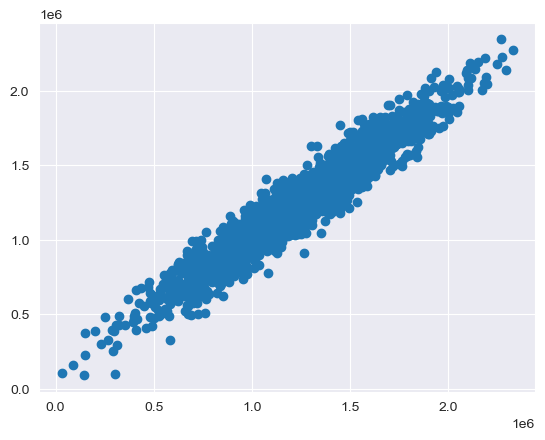

In [61]:
plt.scatter(y_test, predictions)

<Axes: xlabel='Price', ylabel='Count'>

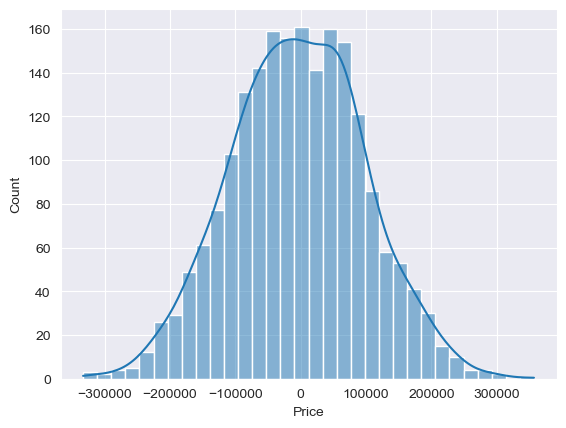

In [58]:
sns.histplot((y_test-predictions),kde=True)
#residuals are th differences between the actual values tested and the predicted values
#normal distrubuted residual is a  good sign the model is a correct choice of the data 

In [64]:
#there three regression Evaluation Metrics
from sklearn import metrics

In [65]:
#MAE
metrics.mean_absolute_error(y_test,predictions)


82288.22251914954

In [66]:
#MSE
metrics.mean_squared_error(y_test,predictions)

10460958907.2095

In [67]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

102278.82922291152